# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [360]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [361]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
}
check_packages(d)

[OK] numpy 1.21.2
[OK] matplotlib 3.4.3
[OK] sklearn 1.0.2


# Example 16 - Neural Network Exercise

### Overview

- [Importing libraries for data analysis and scaling](#importing-libraries-for-data-analysis-and-scaling)
- [Extracting the principal components step by step](#extracting-the-principal-components-step-by-step)
- [Obtaining and preparing the MNIST dataset](#obtaining-and-preparing-the-mnist-dataset)
- [Implementing a multi-layer perceptron](#implementing-a-multi-layer-perceptron)
- [Coding the neural network training loop](#coding-the-neural-network-training-loop)
- [Evaluating the neural network performance](#evaluating-the-neural-network-performance)
- [Summary](#summary)

In [362]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

## Importing libraries for data analysis and scaling

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Extracting the principal components step by step

In [364]:
# Download the wine dataset from the UCI Machine Learning Repository
df = pd.read_csv('dataset1.csv')

In [365]:
# Show the first five rows of the dataset
df.head()

,Col7,Col5,Col2,Col4,Col8,Col3,Col6,Col1,Target
0,20.8,0.733,48,9,22,120,72,56,0
1,32.0,0.444,42,1,29,100,66,196,0
2,34.8,0.217,24,1,45,112,80,132,0
3,31.0,0.874,21,0,16,113,80,0,0
4,26.2,0.313,41,6,30,80,66,0,0


In [366]:
# Show the shape of the dataset
df.shape

(768, 9)

In [367]:
# Splitting the dataset into features and target variable
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values # Target variable is the first column

## Obtaining and preparing the MNIST dataset

The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

- Training set images: train-images-idx3-ubyte.gz (9.9 MB, 47 MB unzipped, 60,000 examples)
- Training set labels: train-labels-idx1-ubyte.gz (29 KB, 60 KB unzipped, 60,000 labels)
- Test set images: t10k-images-idx3-ubyte.gz (1.6 MB, 7.8 MB, 10,000 examples)
- Test set labels: t10k-labels-idx1-ubyte.gz (5 KB, 10 KB unzipped, 10,000 labels)

In [368]:
# Obtain the MNIST dataset
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = X.to_numpy().astype(float)
# y = y.to_numpy().astype(int)

# print(X.shape)
# print(y.shape)

Normalize to [-1, 1] range:

In [369]:
# Normalize images to [-1, 1] range
# X = ((X / 255.) - .5) * 2

Visualize the first digit of each class:

In [370]:
# Visualize the first digit of each class
# fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
# ax = ax.flatten()
# for i in range(10):
#     img = X[y == i][0].reshape(28, 28)
#     ax[i].imshow(img, cmap='Greys')

# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.tight_layout()
# plt.show()

Visualize 25 different versions of "7":

In [371]:
# Visualize 25 different versions of '7' number
# fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
# ax = ax.flatten()
# for i in range(25):
#     img = X[y == 7][i].reshape(28, 28)
#     ax[i].imshow(img, cmap='Greys')

# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.tight_layout()
# plt.show()

Split into training, validation, and test set:

In [372]:
# Split into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=123, stratify=y_temp)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

# optional to free up some memory by deleting non-used arrays
del X_temp, y_temp, X, y

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(521, 8)
(521,)
(131, 8)
(131,)
(116, 8)
(116,)


## Implementing a multi-layer perceptron

In [373]:
# Sigmoid activation function
def sigmoid(z):                                        
    return 1. / (1. + np.exp(-z))

In [374]:
# Int to one-hot encoding function
def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary

In [375]:
# MLP neural network class
class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):  
    
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

In [376]:
# Create a MLP object with 50 hidden units and 10 output units
model = NeuralNetMLP(num_features=8,
                     num_hidden=24,
                     num_classes=2)

## Coding the neural network training loop

Defining data loaders:

In [377]:
# Mini-batch generator function
def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size 
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        
        yield X[batch_idx], y[batch_idx]

Defining a function to compute the loss and accuracy

In [378]:
# Define a function to compute the loss and accuracy
def mse_loss(targets, probas, num_labels=2):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

def compute_mse_and_acc(nnet, X, y, num_labels=2, minibatch_size=10):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
        
    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

In [379]:
# Train function
def train(model, X_train, y_train, X_valid, y_valid, 
          num_epochs, minibatch_size, learning_rate=0.1):
    
    epoch_train_loss = []
    epoch_valid_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
        
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_train_loss.append(train_mse)
        epoch_valid_loss.append(valid_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid MSE: {valid_mse:.2f} '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_train_loss, epoch_valid_loss, epoch_train_acc, epoch_valid_acc

In [380]:
# Train the model

np.random.seed(123) # for the training set shuffling

epoch_train_loss, epoch_valid_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs=10, minibatch_size=10,learning_rate=0.1)

Epoch: 001/010 | Train MSE: 0.23 | Train Acc: 65.00% | Valid MSE: 0.23 | Valid Acc: 64.62%
Epoch: 002/010 | Train MSE: 0.22 | Train Acc: 65.19% | Valid MSE: 0.22 | Valid Acc: 64.62%
Epoch: 003/010 | Train MSE: 0.22 | Train Acc: 65.00% | Valid MSE: 0.21 | Valid Acc: 65.38%
Epoch: 004/010 | Train MSE: 0.21 | Train Acc: 65.19% | Valid MSE: 0.21 | Valid Acc: 65.38%
Epoch: 005/010 | Train MSE: 0.20 | Train Acc: 65.38% | Valid MSE: 0.20 | Valid Acc: 66.92%
Epoch: 006/010 | Train MSE: 0.19 | Train Acc: 66.35% | Valid MSE: 0.19 | Valid Acc: 68.46%
Epoch: 007/010 | Train MSE: 0.19 | Train Acc: 73.65% | Valid MSE: 0.18 | Valid Acc: 76.92%
Epoch: 008/010 | Train MSE: 0.18 | Train Acc: 74.62% | Valid MSE: 0.17 | Valid Acc: 77.69%
Epoch: 009/010 | Train MSE: 0.18 | Train Acc: 75.00% | Valid MSE: 0.17 | Valid Acc: 76.92%
Epoch: 010/010 | Train MSE: 0.17 | Train Acc: 75.19% | Valid MSE: 0.16 | Valid Acc: 78.46%


## Evaluating the neural network performance

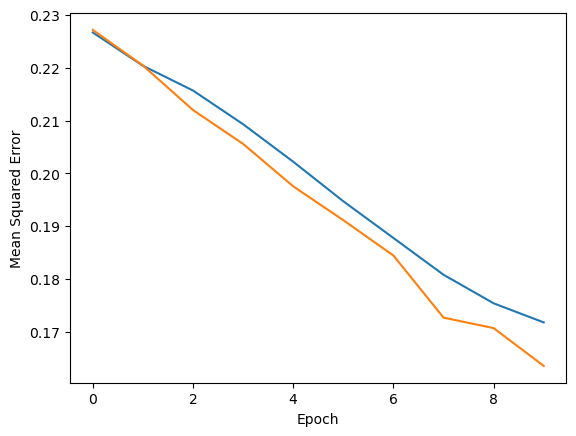

In [381]:
# Plot the training and validation loss
plt.plot(range(len(epoch_train_loss)), epoch_train_loss, label='training')
plt.plot(range(len(epoch_valid_loss)), epoch_valid_loss, label='Validation')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

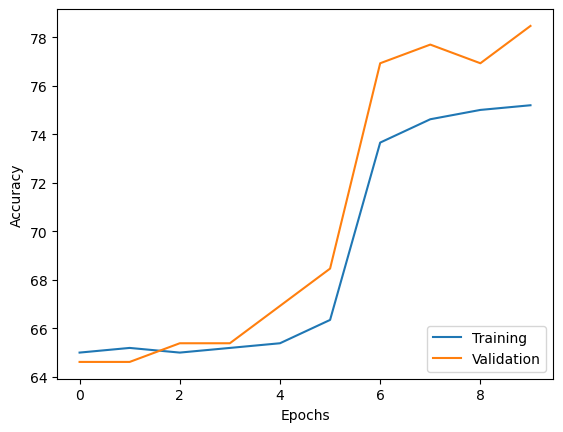

In [382]:
# Plot the training and validation accuracy
plt.plot(range(len(epoch_train_acc)), epoch_train_acc, label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc, label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

In [383]:
# Compute the test accuracy
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 81.82%


Plot failure cases:

In [384]:
# Plot failure cases
# X_test_subset = X_test[:1000, :]
# y_test_subset = y_test[:1000]

# _, probas = model.forward(X_test_subset)
# test_pred = np.argmax(probas, axis=1)

# misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
# misclassified_labels = test_pred[y_test_subset != test_pred][:25]
# correct_labels = y_test_subset[y_test_subset != test_pred][:25]

# fig, ax = plt.subplots(nrows=5, ncols=5, 
#                        sharex=True, sharey=True, figsize=(8, 8))
# ax = ax.flatten()
# for i in range(25):
#     img = misclassified_images[i].reshape(28, 28)
#     ax[i].imshow(img, cmap='Greys', interpolation='nearest')
#     ax[i].set_title(f'{i+1}) '
#                     f'True: {correct_labels[i]}\n'
#                     f' Predicted: {misclassified_labels[i]}')

# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.tight_layout()
# plt.show()

# Summary

---

Readers may ignore the next cell.

In [385]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex16.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex16.ipynb.
# * --output ex16.py
# This option tells the script to save the output (the converted file) with the name
# ex16.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex16.ipynb --output ex16.py

[NbConvertApp] Converting notebook ex16.ipynb to script
[NbConvertApp] Writing 16752 bytes to ex16.py
